In [27]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

Given the function:

\begin{equation}
f(x)=2x^2-2x+3
\end{equation}

Find the global minima of the function.

Analytically:

\begin{align*}
f(x) = 2x^2-2x+3 \\
f'(x) = 4x-2
\end{align*}

setting $f'(x) = 0$

\begin{align*}
f'(x) = 4x-2 \\
0 = 4x-2 \\
2=4x \\
\frac{2}{4}=x \\
x = \frac{1}{2} \\
x = 0.5
\end{align*}

In [28]:
# function (as a function)
def f(x):
  return 2*x**2 - 2*x + 3

# derivative function
def df(x):
  return 4*x - 2

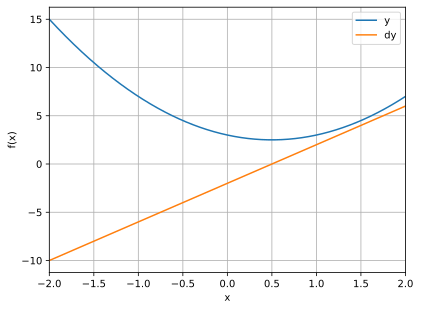

In [29]:
# plot the function and its derivative

# define a range for x
x = np.linspace(-2,2,2001)

# plotting
plt.plot(x,f(x), x,df(x))
plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['y','dy'])
plt.show()

In [30]:
# random starting point
localmin = np.random.choice(x,1)

# learning parameters
learning_rate = .01
training_epochs = 100

# Gradient Descent code
for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate*grad

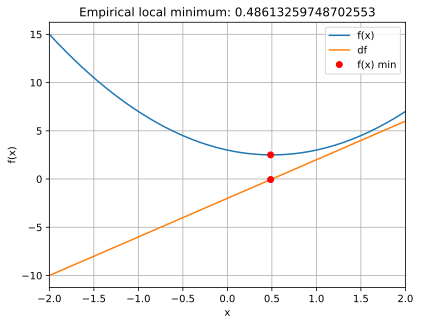

In [31]:
# plot the results

plt.plot(x,f(x), x,df(x))
plt.plot(localmin,df(localmin),'ro')
plt.plot(localmin,f(localmin),'ro')

plt.xlim(x[[0,-1]])
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['f(x)','df','f(x) min'])
plt.title('Empirical local minimum: %s'%localmin[0])
plt.show()

# Question:

- Why is the result of th gradient descent not equal to the analytical solution?

In [32]:
# learning parameters
learning_rate = .01
training_epochs = 100

# run through training and store all the results
modelparams = np.zeros((training_epochs,2))
for i in range(training_epochs):
  grad = df(localmin)
  localmin = localmin - learning_rate*grad
  modelparams[i,0] = localmin
  modelparams[i,1] = grad

/tmp/ipython-input-2688987389.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,0] = localmin
/tmp/ipython-input-2688987389.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelparams[i,1] = grad


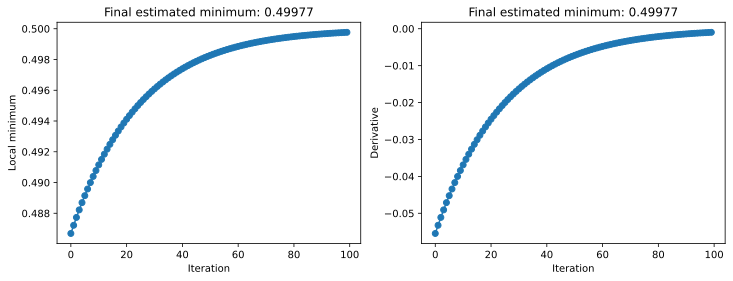

In [33]:
# plot the gradient over iterations

fig,ax = plt.subplots(1,2,figsize=(12,4))

for i in range(2):
  ax[i].plot(modelparams[:,i],'o-')
  ax[i].set_xlabel('Iteration')
  ax[i].set_title(f'Final estimated minimum: {localmin[0]:.5f}')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')

plt.show()

# Exercises

Task:

- Experiment with the values of the learning rate and graph the plot of the local minimum. Describe the result as the value of the learning rate increases.
- Find a random value of the treshold and modify the gradient descent code to include early stopping.

Stopping threshold: 0.09245
✅ Early stopping at iteration 96 (|grad|=0.09137)


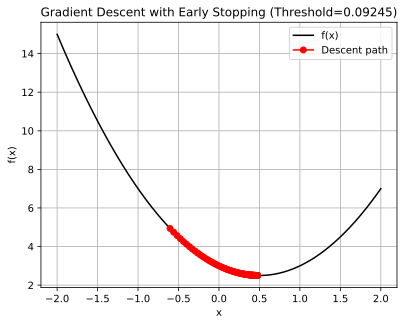

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x**2 - 2*x + 3

def df(x):
    return 4*x - 2

# Generate input values
x = np.linspace(-2, 2, 2001)

# Choose a random starting point (convert to scalar)
localmin = np.random.choice(x, 1).item()

# Learning parameters
learning_rate = 0.01
training_epochs = 100
threshold = 0.09245  # stopping condition

print(f"Stopping threshold: {threshold:.5f}")

# Store (iteration, position, gradient)
modelparams = []

for i in range(training_epochs):
    grad = df(localmin)
    localmin = localmin - learning_rate * grad
    modelparams.append((i, localmin, grad))

    # ✅ Use scalar comparison
    if abs(grad) < threshold:
        print(f"✅ Early stopping at iteration {i} (|grad|={abs(grad):.5f})")
        break

modelparams = np.array(modelparams)

# Plot results
plt.plot(x, f(x), label='f(x)', color='black')
plt.plot(modelparams[:,1], f(modelparams[:,1]), 'ro-', label='Descent path')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Gradient Descent with Early Stopping (Threshold={threshold:.5f})')
plt.legend()
plt.grid(True)
plt.show()


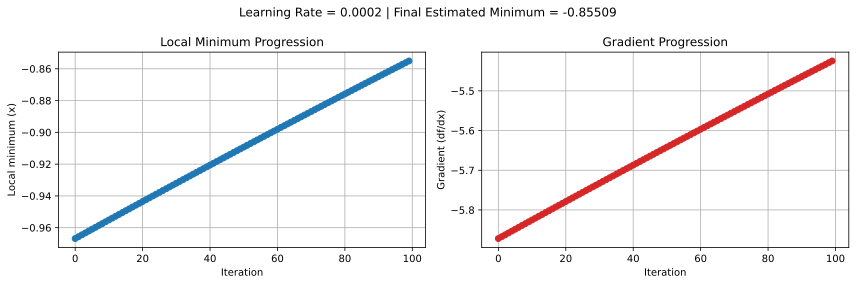

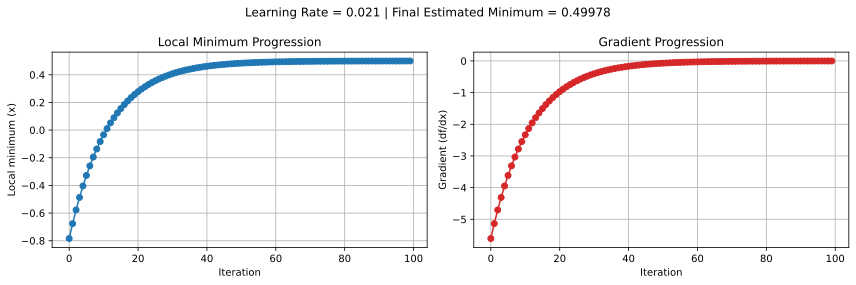

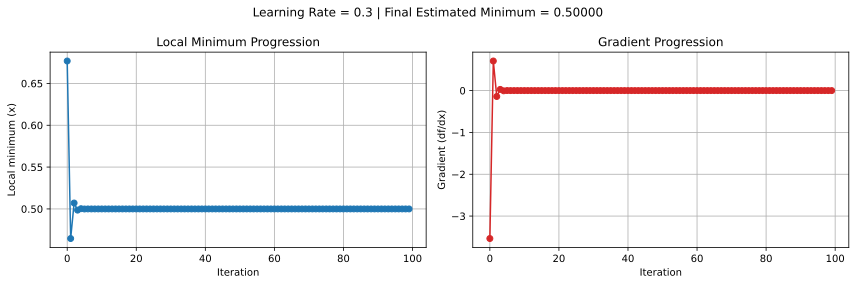

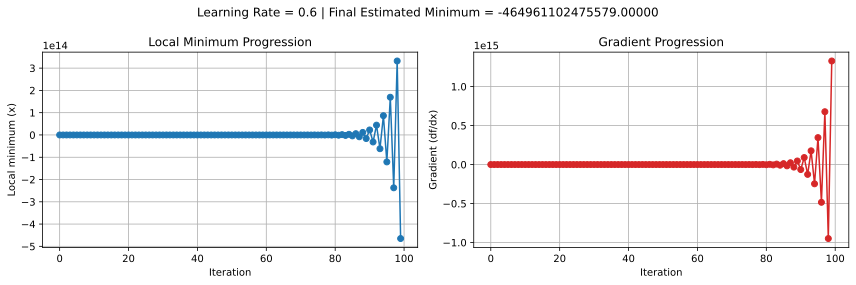

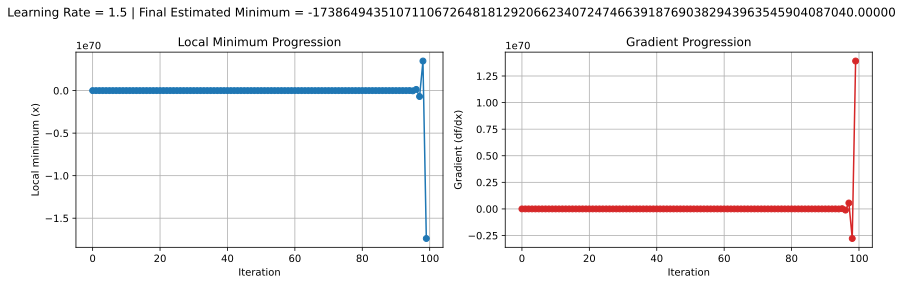

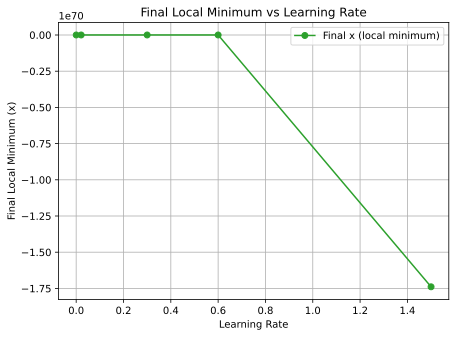

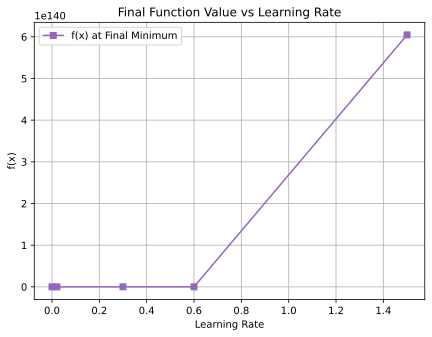

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define function and derivative
def f(x):
    return 2*x**2 - 2*x + 3

def df(x):
    return 4*x - 2

# Range of x-values
x = np.linspace(-2, 2, 2001)

# Learning rates to experiment with
learning_rates = [0.0002, 0.021, 0.3, 0.6, 1.5]
training_epochs = 100

# Store final minima for each learning rate
final_minima = []
final_f_values = []

# Loop through each learning rate and record gradient descent progress
for lr in learning_rates:
    # Initialize random starting point (scalar)
    localmin = np.random.choice(x, 1).item()

    # Store (iteration, position, gradient)
    modelparams = np.zeros((training_epochs, 2))

    for i in range(training_epochs):
        grad = df(localmin)
        localmin = localmin - lr * grad
        modelparams[i, 0] = localmin   # store position
        modelparams[i, 1] = grad       # store gradient

    # Record final local minimum and its f(x)
    final_minima.append(localmin)
    final_f_values.append(f(localmin))

    # --- Plot the results for this learning rate ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Learning Rate = {lr} | Final Estimated Minimum = {localmin:.5f}', fontsize=12)

    # Plot how local minimum changes
    ax[0].plot(modelparams[:, 0], 'o-', color='tab:blue')
    ax[0].set_xlabel('Iteration')
    ax[0].set_ylabel('Local minimum (x)')
    ax[0].set_title('Local Minimum Progression')
    ax[0].grid(True)

    # Plot how gradient changes
    ax[1].plot(modelparams[:, 1], 'o-', color='tab:red')
    ax[1].set_xlabel('Iteration')
    ax[1].set_ylabel('Gradient (df/dx)')
    ax[1].set_title('Gradient Progression')
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

# --- Plot final local minimum vs learning rates ---
plt.figure(figsize=(7, 5))
plt.plot(learning_rates, final_minima, 'o-', color='tab:green', label='Final x (local minimum)')
plt.xlabel('Learning Rate')
plt.ylabel('Final Local Minimum (x)')
plt.title('Final Local Minimum vs Learning Rate')
plt.grid(True)
plt.legend()
plt.show()

# (Optional) also plot f(x) vs learning rate
plt.figure(figsize=(7, 5))
plt.plot(learning_rates, final_f_values, 's-', color='tab:purple', label='f(x) at Final Minimum')
plt.xlabel('Learning Rate')
plt.ylabel('f(x)')
plt.title('Final Function Value vs Learning Rate')
plt.grid(True)
plt.legend()
plt.show()
